In [1]:
# installing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
data = pd.read_excel("C:/Users/chanhen/Desktop/Fall2023/CPIS342/assignments/covid19_raw.xlsx", sheet_name='Saudi')

In [2]:
data.columns

Index(['Date', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Tot Deaths/1M pop'],
      dtype='object')

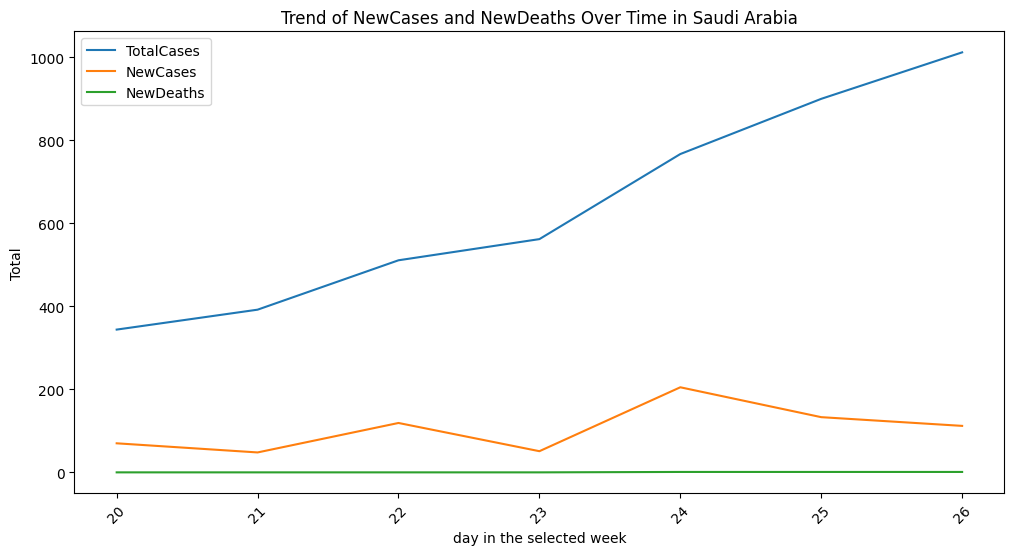

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Define 'saudi' as the pandas DataFrame with columns 'Date', 'TotalCases', 'NewCases' and 'NewDeaths'
# Create a line plot to display the trend of 'TotalCases', 'NewCases' and 'NewDeaths' by 'Date'
sns.lineplot(x='Date', y='TotalCases', data=data, label='TotalCases')
sns.lineplot(x='Date', y='NewCases', data=data, label='NewCases')
sns.lineplot(x='Date', y='NewDeaths', data=data, label='NewDeaths')
# Add more lines for additional parameters as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Trend of NewCases and NewDeaths Over Time in Saudi Arabia')
plt.xlabel('day in the selected week')
plt.ylabel('Total')

# Display the plot
plt.legend()
plt.show()

In [4]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [5]:
# 'NewCase' is the dependent variable in linear regression, therefore it is the value of 'test'
train = data
test = data['NewCases']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [6]:
train.isnull().sum()

Date                 0
TotalCases           0
NewCases             0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Serious,Critical     6
Tot Cases/1M pop     0
Tot Deaths/1M pop    4
dtype: int64

In [7]:
#replace missing values with median
y_cleanTest = y_test.fillna(y_test.median())
X_cleanTest = X_test.drop('Serious,Critical', axis=1)
X_cleanTest = X_test.drop('Serious,Critical', axis=1).fillna(X_test.drop('Serious,Critical', axis=1).median())

# Display the DataFrame with NaN values replaced
print(X_cleanTest)

   Date  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
4    24         767       205            1          1              28   
1    21         392        48            0          0              16   
3    23         562        51            0          0              19   

   ActiveCases  Tot Cases/1M pop  Tot Deaths/1M pop  
4          738                22               0.03  
1          376                11               0.03  
3          543                16               0.03  


In [8]:
y_cleanTest.isnull().sum()

0

In [9]:
X_cleanTest.isnull().sum()

Date                 0
TotalCases           0
NewCases             0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Tot Cases/1M pop     0
Tot Deaths/1M pop    0
dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_cleanTest, y_cleanTest)

LinearRegression()

In [11]:
pred = regr.predict(X_cleanTest)
pred
score = regr.score(X_cleanTest, y_cleanTest)
print("Hold-Out Score:", score)

Hold-Out Score: 1.0
